# Visualizing Errors

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself. For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe. I known that the current literature suggests a value of around 71 (km/s)Mpc, and I measure a value of 74(km/s) Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71+- 2.5(km/s) Mpc, and my method has measured a value of 74 +- 5(km/s)Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

# Basic Errorbars

A basic errorbar can be created with a single matplotlib function call:

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import numpy as np

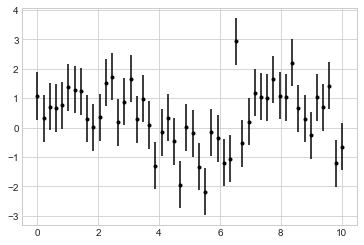

In [4]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

Here the `fmt` is a format code controlling the appearance of lines and points, and has the same syntax as the shorthand used in `plt.plot`, outlined in simple ine plots and simple scatter plots.

In addition to these basic options, the `errorbar` function has many options to fine-tune the outputs. Using these additinoal options you can easily customize the aesthetics of your errorbar plot. I often find it helpful, especially in crowded plots, to make the errorbars lighter than the pints themselves:

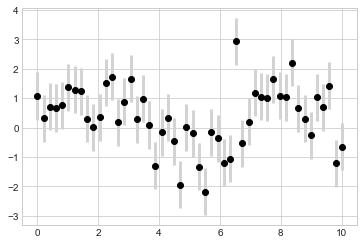

In [11]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);

In addition to these options, you can also specify horizontal errorbars (`xerr`), one-sided errorbars, and many other variants. For more informatino on the options available, refer to the dosctring of `plt.errorbar`.

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantites. Though Matplotlib does not have a built-in convenience routine for this type of applicatoin, it's relativley easy to combine primitives like `plt.plot` and `plt.fill_between` for a useful result.

Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API. This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty. We won't delve into the details of Gaussigan process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

In [33]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data 

model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)


# Compute the Gaussian process fit 
gp = GaussianProcessRegressor(optimizer=model, random_state=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(std) # 2 * sigma ~95% confidence region.

We now have `xfit`, `yfit`, and `dyfit`, which sample the continuous fit to our data. We could pass these to the `plt.errorbar` functions as above, but we don't really want to plot 1,000 points with 1,000 errorbars. Instead, we can use the `plt.fill_between` function with a light color to visualize this continuous error:

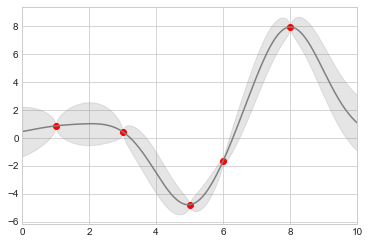

In [38]:
# Visualize the result

plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlim(0, 10);

Note what we've done here the `fill_between` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained adn this is reflected in the small model errors. I regrions far from a measured data point, the model is not strongly constrained, and the model errors increase.

For more information on the options available in `plt.fill_between()` and the closely related `plt.fill()`. If this seems a bit too low level for your taste, refer to Seaborn.